# Problemas de regresión

## 1. Diabetes

#### Importamos las librerías a utilizar

In [52]:
import numpy as np
from sklearn.metrics import r2_score, classification_report
from neural_network.NeuralNetwork import NeuralNetwork
from neural_network.DenseLayer import DenseLayer
from neural_network.Activation import ReLU
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt


#### Carga y preprcesamiento de los datos

In [53]:

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

# Normalize the data
y = y.reshape(-1, 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Inicialización y entrenamiento del modelo

In [54]:
# Set up the neural network for regression
network = NeuralNetwork(
    DenseLayer(10, 5, optimizer='adam'),
    ReLU(),
    DenseLayer(5, 1, optimizer='adam')
)
metrics = network.train(X_train, y_train, epochs=10000, learning_rate=0.001, loss='mse',patience=10)

Epoch 0, Loss Train(MSE): 28507.223578348192, R2 Train: -3.6165655472767497
,Loss Valid(MSE): 34078.28794068466, R2 Valid: -5.338644008378757
Epoch 1, Loss Train(MSE): 28215.216531890062, R2 Train: -3.569276842835377
,Loss Valid(MSE): 33735.69618171113, R2 Valid: -5.274921112319035
Epoch 2, Loss Train(MSE): 27924.287901724034, R2 Train: -3.522162781129241
,Loss Valid(MSE): 33406.99350587809, R2 Valid: -5.213781619327672
Epoch 3, Loss Train(MSE): 27583.569618417863, R2 Train: -3.466985598275376
,Loss Valid(MSE): 33033.52665738181, R2 Valid: -5.144315881915351
Epoch 4, Loss Train(MSE): 27110.478305400924, R2 Train: -3.390371435889925
,Loss Valid(MSE): 32530.48407159955, R2 Valid: -5.050748743863168
Epoch 5, Loss Train(MSE): 26346.2084906416, R2 Train: -3.266602746668246
,Loss Valid(MSE): 31725.720484862064, R2 Valid: -4.901060769628261
Epoch 6, Loss Train(MSE): 24988.34674821257, R2 Train: -3.046705578470351
,Loss Valid(MSE): 30298.12485261259, R2 Valid: -4.63552452800438
Epoch 7, Loss T

#### Análisis y visualizacion de resultados

MSE:2856.015668899345 
 R2:0.46094113485915456


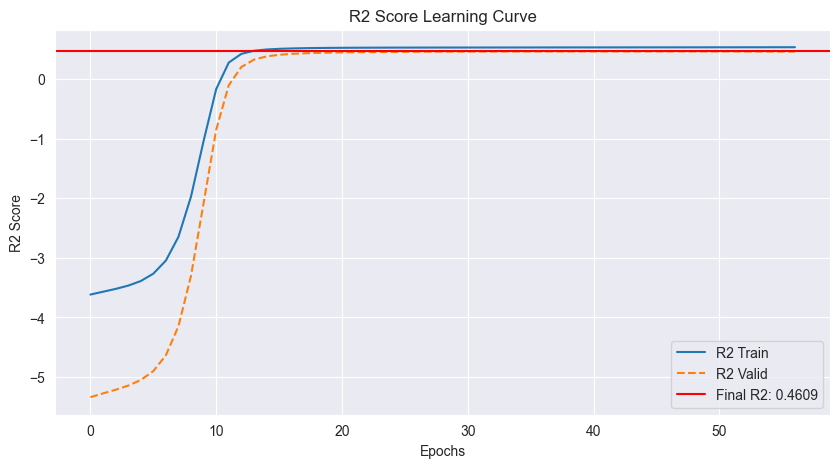

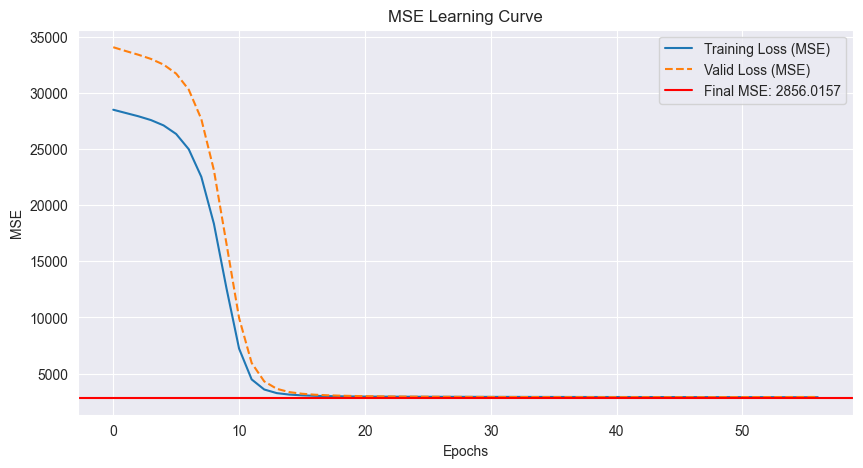

In [55]:
# Calculate MSE and R2
predicted = network.predict(X_test)
mse = network.compute_loss(predicted, y_test, "mse")
r2 = r2_score(y_test.flatten(), predicted.flatten())
print(f"MSE:{mse} \n R2:{r2}")

# Plot the learning curves for R2 Score
plt.figure(figsize=(10, 5))
plt.plot(metrics["r2_history_train"], label='R2 Train')
plt.plot(metrics["r2_history_valid"], label='R2 Valid', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.title('R2 Score Learning Curve')
plt.legend()
plt.axhline(y=r2, color='r', linestyle='-', label=f'Final R2: {r2:.4f}')
plt.legend()
plt.show()

# Plot the learning curves for MSE
plt.figure(figsize=(10, 5))
plt.plot(metrics["loss_history_train"], label='Training Loss (MSE)')
plt.plot(metrics["loss_history_valid"], label='Valid Loss (MSE)', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE Learning Curve')
plt.legend()
plt.axhline(y=mse, color='r', linestyle='-', label=f'Final MSE: {mse:.4f}')
plt.legend()
plt.show()



### Probar los distintos optimizers

Training with sgd_momentum
Epoch 0, Loss Train(MSE): 28280.33039709788, R2 Train: -3.579821623737743
,Loss Valid(MSE): 33690.23854200153, R2 Valid: -5.266465881349633
Epoch 1, Loss Train(MSE): 27669.39844383512, R2 Train: -3.4808850366859785
,Loss Valid(MSE): 33022.513266794194, R2 Valid: -5.142267364619481
Epoch 2, Loss Train(MSE): 26323.41142578293, R2 Train: -3.262910905408563
,Loss Valid(MSE): 31508.178365836025, R2 Valid: -4.8605974091526845
Epoch 3, Loss Train(MSE): 22930.81841324741, R2 Train: -2.713501806533742
,Loss Valid(MSE): 27684.338559210413, R2 Valid: -4.1493539534528185
Epoch 4, Loss Train(MSE): 15641.995645410228, R2 Train: -1.5331228061823778
,Loss Valid(MSE): 19391.91765390084, R2 Valid: -2.606943601797716
Epoch 5, Loss Train(MSE): 9406.962318121861, R2 Train: -0.5233983773627238
,Loss Valid(MSE): 11112.97749410183, R2 Valid: -1.0670407014238434
Epoch 6, Loss Train(MSE): 16764.794879056997, R2 Train: -1.714953079632766
,Loss Valid(MSE): 16586.98864329057, R2 Valid: -

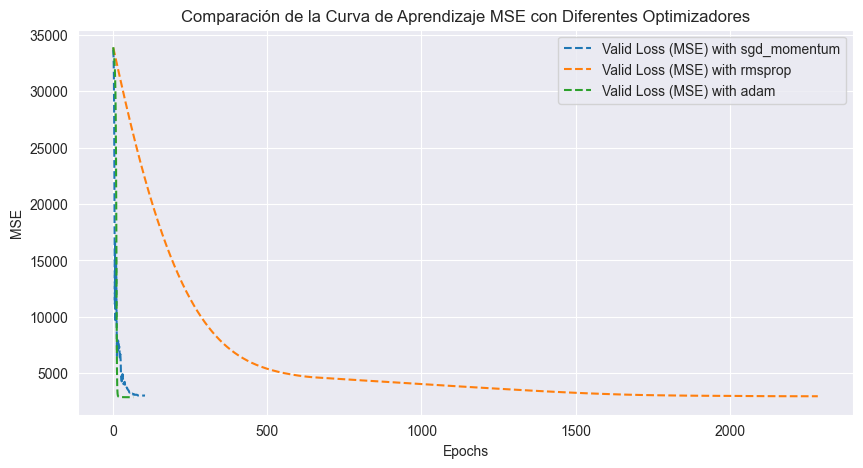

In [56]:
# Lista de optimizadores a probar
optimizers = ["sgd_momentum", "rmsprop", "adam"]

# Diccionario para almacenar las métricas de cada optimizador
optimizer_metrics = {}

for optimizer in optimizers:
    print(f"Training with {optimizer}")
    
    # Crear una nueva instancia de la red neuronal con el optimizador actual
    network = NeuralNetwork(
        DenseLayer(10, 5, optimizer=optimizer),
        ReLU(),
        DenseLayer(5, 1, optimizer=optimizer)
    )
    
    # Entrenar la red neuronal
    metrics = network.train(X_train, y_train, epochs=10000, learning_rate=0.001, loss='mse', patience=10)
    
    # Almacenar las métricas para este optimizador
    optimizer_metrics[optimizer] = metrics

# Plot de la curva de aprendizaje de MSE para cada optimizador
plt.figure(figsize=(10, 5))

for optimizer, metrics in optimizer_metrics.items():
    plt.plot(metrics["loss_history_valid"], label=f'Valid Loss (MSE) with {optimizer}', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Comparación de la Curva de Aprendizaje MSE con Diferentes Optimizadores')
plt.legend()
plt.show()

El análisis de regresión sobre el conjunto de datos de diabetes ha producido resultados mixtos. La red neuronal, diseñada con dos capas densas y activación ReLU, seguida por una salida lineal, alcanzó un coeficiente de determinación R2 de aproximadamente 0.46 en el conjunto de prueba. Este valor de R2, que mide la proporción de la varianza de la variable dependiente que es predecible a partir de las variables independientes, indica una capacidad moderada de la red para modelar la relación entre las características de los pacientes y la progresión de la diabetes.

Las curvas de aprendizaje muestran una disminución sostenida en la pérdida de entrenamiento y validación, con una convergencia que sugiere un ajuste adecuado sin sobreajuste significativo. Sin embargo, el valor final de MSE es relativamente alto, lo que sugiere que el modelo todavía puede mejorarse. La comparación entre diferentes optimizadores revela que el optimizador Adam proporciona una reducción de error más rápida y efectiva en comparación con SGD con momentum y RMSprop, lo que se refleja en las curvas de aprendizaje de la pérdida de validación.

Para mejorar el modelo, podríamos experimentar con una arquitectura de red más compleja, explorar técnicas de regularización para reducir la varianza del modelo, y considerar el ajuste fino de hiperparámetros como la tasa de aprendizaje y el número de neuronas en cada capa.

## 2. Desempeño estudiante

#### Importamos las librerías a utilizar

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from neural_network.DenseLayer import DenseLayer
from neural_network.Activation import Sigmoid, Softmax, ReLU
from neural_network.NeuralNetwork import NeuralNetwork
from neural_network.LossFunctions import CrossEntropy

#### Carga y preprocesamiento de los datos

In [58]:

# Carga de datos
df = pd.read_csv('datasets/Student_Performance.csv')

# Preprocesamiento
X = df.drop('Performance Index', axis=1)
y = df['Performance Index'].values

# ColumnTransformer para preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']),
        ('cat', OneHotEncoder(), ['Extracurricular Activities'])
    ])

# Dividir en conjuntos de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar preprocesamiento
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1, 1)
n_input_features = X_train.shape[1]  # Número de características de entrada después del preprocesamiento

#### Inicialización y entrenamiento del modelo

In [59]:
# Set up the neural network for regression
network = NeuralNetwork(
    DenseLayer(n_input_features, 5, optimizer='adam'),
    ReLU(),
    DenseLayer(5, 1, optimizer='adam')
)
metrics = network.train(X_train, y_train, epochs=10000, learning_rate=0.001, loss='mse',patience=10,min_delta=0.05)

Epoch 0, Loss Train(MSE): 3408.831905694108, R2 Train: -8.253984334799942
,Loss Valid(MSE): 3401.5243211366965, R2 Valid: -8.195703586965676
Epoch 1, Loss Train(MSE): 3353.7890502931596, R2 Train: -8.104559037303696
,Loss Valid(MSE): 3346.654185783976, R2 Valid: -8.047367296278303
Epoch 2, Loss Train(MSE): 3299.3359135247315, R2 Train: -7.956734653885427
,Loss Valid(MSE): 3292.4325786784916, R2 Valid: -7.900784241189539
Epoch 3, Loss Train(MSE): 3242.9714015229956, R2 Train: -7.803721444219256
,Loss Valid(MSE): 3236.367549412946, R2 Valid: -7.749217666311067
Epoch 4, Loss Train(MSE): 3182.216972915325, R2 Train: -7.638790891420227
,Loss Valid(MSE): 3175.9507930615073, R2 Valid: -7.585886603339834
Epoch 5, Loss Train(MSE): 3114.3688724995304, R2 Train: -7.4546030887465555
,Loss Valid(MSE): 3108.4322986512225, R2 Valid: -7.403356654229343
Epoch 6, Loss Train(MSE): 3036.2668143361357, R2 Train: -7.242578781665763
,Loss Valid(MSE): 3030.602769971085, R2 Valid: -7.192951786150486
Epoch 7, L

#### Análisis y visualización de resultados

MSE:4.247270697381097 
 R2:0.9885390143478372


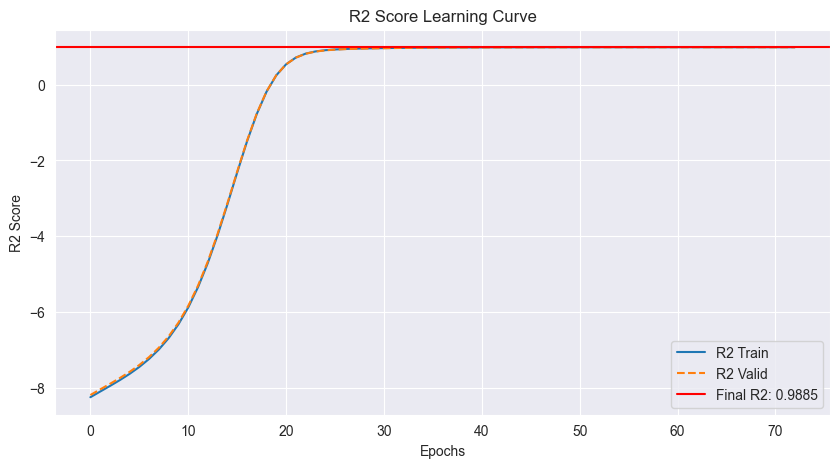

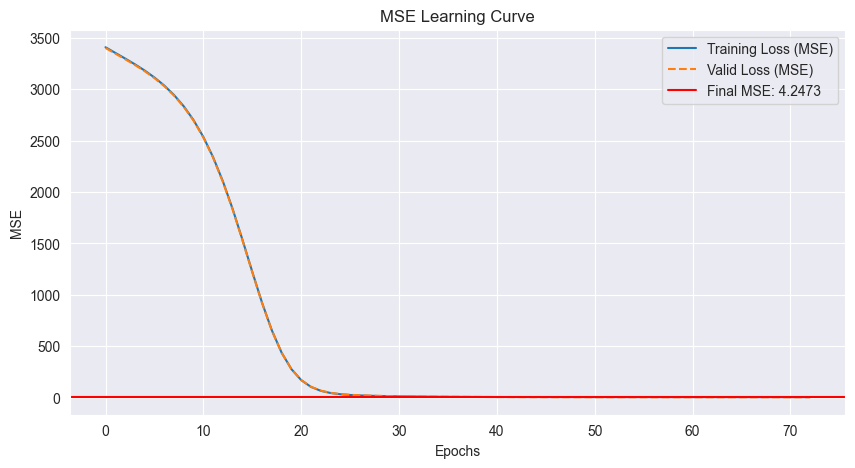

In [60]:
# Calculate MSE and R2
predicted = network.predict(X_test)
mse = network.compute_loss(predicted, y_test, "mse")
r2 = r2_score(y_test.flatten(), predicted.flatten())
print(f"MSE:{mse} \n R2:{r2}")

# Plot the learning curves for R2 Score
plt.figure(figsize=(10, 5))
plt.plot(metrics["r2_history_train"], label='R2 Train')
plt.plot(metrics["r2_history_valid"], label='R2 Valid', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.title('R2 Score Learning Curve')
plt.legend()
plt.axhline(y=r2, color='r', linestyle='-', label=f'Final R2: {r2:.4f}')
plt.legend()
plt.show()

# Plot the learning curves for MSE
plt.figure(figsize=(10, 5))
plt.plot(metrics["loss_history_train"], label='Training Loss (MSE)')
plt.plot(metrics["loss_history_valid"], label='Valid Loss (MSE)', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE Learning Curve')
plt.legend()
plt.axhline(y=mse, color='r', linestyle='-', label=f'Final MSE: {mse:.4f}')
plt.legend()
plt.show()

#### Conclusiones

La red neuronal aplicada a la predicción del desempeño de estudiantes ha demostrado ser extraordinariamente efectiva, alcanzando un coeficiente R2 próximo a 0.99 en el conjunto de prueba. Este resultado indica que la red es capaz de explicar casi toda la variabilidad del índice de rendimiento de los estudiantes, sugiriendo una correlación muy fuerte entre las predicciones del modelo y los valores reales.

La pérdida de error cuadrático medio (MSE) del modelo es sorprendentemente baja, con un valor final de aproximadamente 4.10, lo que refleja la alta precisión de las predicciones del modelo en términos de la magnitud de los errores. Las curvas de aprendizaje muestran una rápida convergencia de la pérdida tanto en el conjunto de entrenamiento como en el de validación, lo cual es indicativo de un buen ajuste del modelo sin señales de sobreajuste ni de falta de ajuste.

La arquitectura de la red, que consta de una capa de entrada escalada y normalizada seguida de capas densas y activación ReLU, parece ser adecuada para capturar las complejas relaciones no lineales entre las horas de estudio, las puntuaciones previas, las horas de sueño, la práctica con exámenes de muestra y las actividades extracurriculares con respecto al desempeño académico.